In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
file_path = r'/Heart_data.csv'
df = pd.read_csv(file_path)

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,NaN,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,NaN,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [4]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1587,52.0,1.0,3.0,172.0,199.0,1.0,0.0,162.0,0.0,0.5,1.0,0.0,7.0,1
1588,44.0,1.0,2.0,120.0,263.0,0.0,0.0,173.0,0.0,0.0,1.0,0.0,7.0,1
1589,56.0,0.0,NaN,140.0,294.0,0.0,2.0,153.0,0.0,1.3,2.0,0.0,3.0,1
1590,57.0,1.0,4.0,140.0,192.0,0.0,0.0,148.0,0.0,0.4,2.0,0.0,6.0,1
1591,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1592 entries, 0 to 1591
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1513 non-null   float64
 1   sex       1561 non-null   float64
 2   cp        1433 non-null   float64
 3   trestbps  1592 non-null   float64
 4   chol      1529 non-null   float64
 5   fbs       1513 non-null   float64
 6   restecg   1585 non-null   float64
 7   thalach   1592 non-null   float64
 8   exang     1545 non-null   float64
 9   oldpeak   1561 non-null   float64
 10  slope     1538 non-null   float64
 11  ca        1592 non-null   float64
 12  thal      1585 non-null   float64
 13  target    1592 non-null   int64  
dtypes: float64(13), int64(1)
memory usage: 174.2 KB


In [6]:
df.shape

(1592, 14)

#### Checking for null/Nan values

In [7]:
df.isnull().sum()

age          79
sex          31
cp          159
trestbps      0
chol         63
fbs          79
restecg       7
thalach       0
exang        47
oldpeak      31
slope        54
ca            0
thal          7
target        0
dtype: int64

In [8]:
# df = df.fillna(method="ffill")

In [9]:
df = df.dropna()

In [10]:
df.shape

(1113, 14)

In [11]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

#### Check for duplicate values

In [12]:
df.duplicated().sum()

444

In [13]:
df = df.drop_duplicates()

In [14]:
df.duplicated().sum()

0

In [15]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.096935,0.039091,0.258621,0.204540,0.153230,0.038321,-0.414134,0.114652,0.199481,0.039335,0.338326,0.094195,0.088763
sex,-0.096935,1.000000,-0.025083,-0.044251,-0.198057,0.059623,-0.015006,-0.065093,0.170334,0.088815,0.002739,0.108569,0.230905,0.060136
cp,0.039091,-0.025083,1.000000,-0.017090,0.001398,0.018477,0.232450,-0.016400,0.004990,0.015193,0.207115,0.019753,0.535419,0.506723
trestbps,0.258621,-0.044251,-0.017090,1.000000,0.095248,0.223733,0.029850,-0.029396,0.069727,0.181840,-0.022045,0.102358,0.087936,0.073609
chol,0.204540,-0.198057,0.001398,0.095248,1.000000,0.018952,0.067793,-0.027968,0.075336,0.046858,-0.028956,0.130762,0.040868,0.047941
fbs,0.153230,0.059623,0.018477,0.223733,0.018952,1.000000,0.039849,-0.012893,0.027397,-0.012560,-0.033860,0.161014,0.024472,0.032126
restecg,0.038321,-0.015006,0.232450,0.029850,0.067793,0.039849,1.000000,-0.023431,0.019312,0.011329,0.134230,0.071897,0.151575,0.254244
thalach,-0.414134,-0.065093,-0.016400,-0.029396,-0.027968,-0.012893,-0.023431,1.000000,-0.369729,-0.358526,-0.097779,-0.248738,-0.159630,-0.137310
exang,0.114652,0.170334,0.004990,0.069727,0.075336,0.027397,0.019312,-0.369729,1.000000,0.288406,0.043423,0.147251,0.251678,0.134449
oldpeak,0.199481,0.088815,0.015193,0.181840,0.046858,-0.012560,0.011329,-0.358526,0.288406,1.000000,0.070484,0.251253,0.221989,0.167672


In [16]:
#pip install seaborn

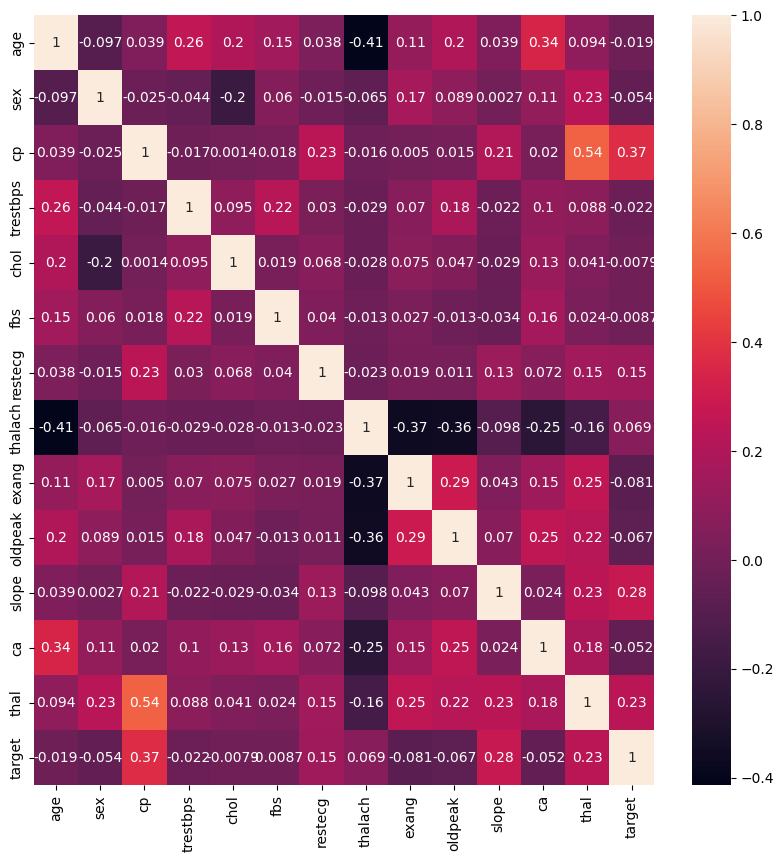

In [34]:
plt.figure(figsize = (10,10))
sns.heatmap(df.corr(), annot=True);

In [18]:
import plotly.express as px

In [35]:
#plt.imshow(df.corr())

### Fixing the target variable

In [20]:
def target(x):
    if x >= 1:
        return 1
    else:
        return 0
df["target"] = df["target"].map(target)

### Checking for imbalanced data

In [21]:
df["target"].value_counts(normalize=True)

1    0.635277
0    0.364723
Name: target, dtype: float64

In [22]:
# Our data is not balanced

In [23]:
X = df.drop(columns="target")
y = df["target"]

In [24]:
from imblearn.over_sampling import RandomOverSampler

In [25]:
sampler = RandomOverSampler(random_state=42)
X_over, y_over = sampler.fit_resample(X, y)

In [26]:
sampled_df = pd.concat([X_over, y_over], axis=1)

In [27]:
sampled_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
2,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
3,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0
4,62.0,0.0,4.0,140.0,268.0,0.0,2.0,160.0,0.0,3.6,3.0,2.0,3.0,1


### EDA

#Is there a relationship between trestbps and thal

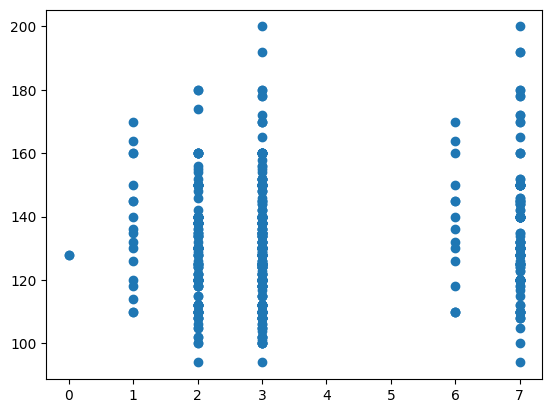

In [28]:
plt.scatter(df["thal"], df["trestbps"]);

In [29]:
#There's no relationship between thal and trestbps

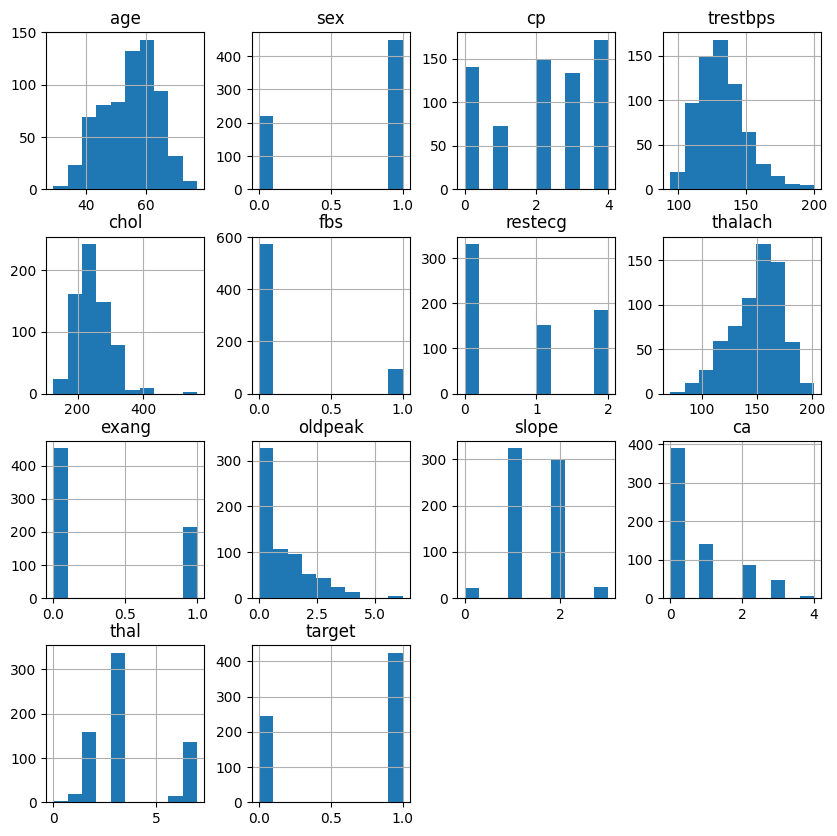

In [30]:
df.hist(figsize=(10, 10));

In [31]:
#What is the relationship of age to the target

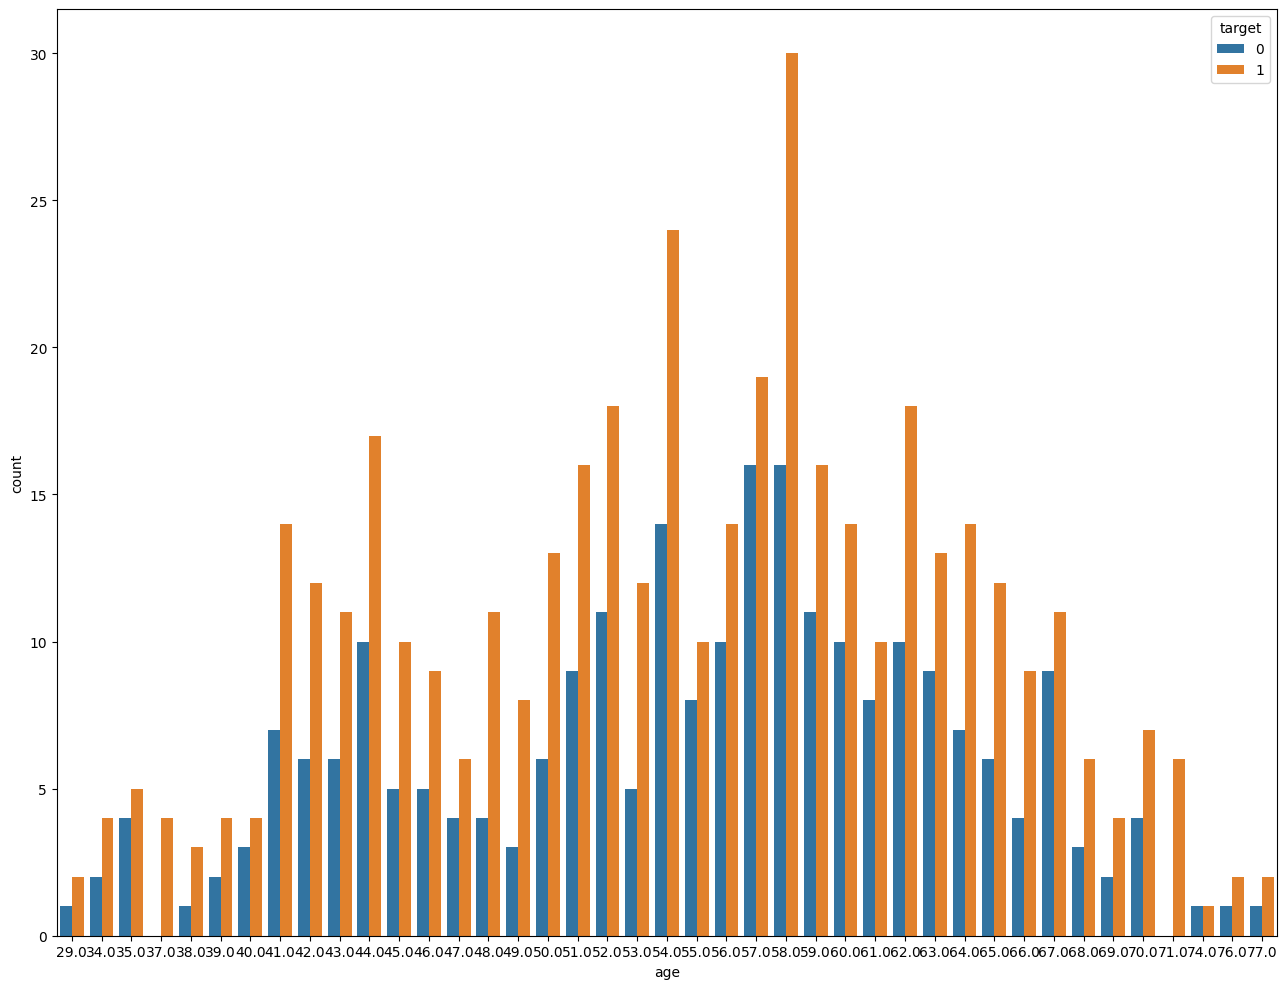

In [40]:
plt.figure(figsize=(13,10))
sns.countplot(x=df["age"], hue =df["target"])
plt.tight_layout()

In [ ]:
#What is the relationship of sex to the target

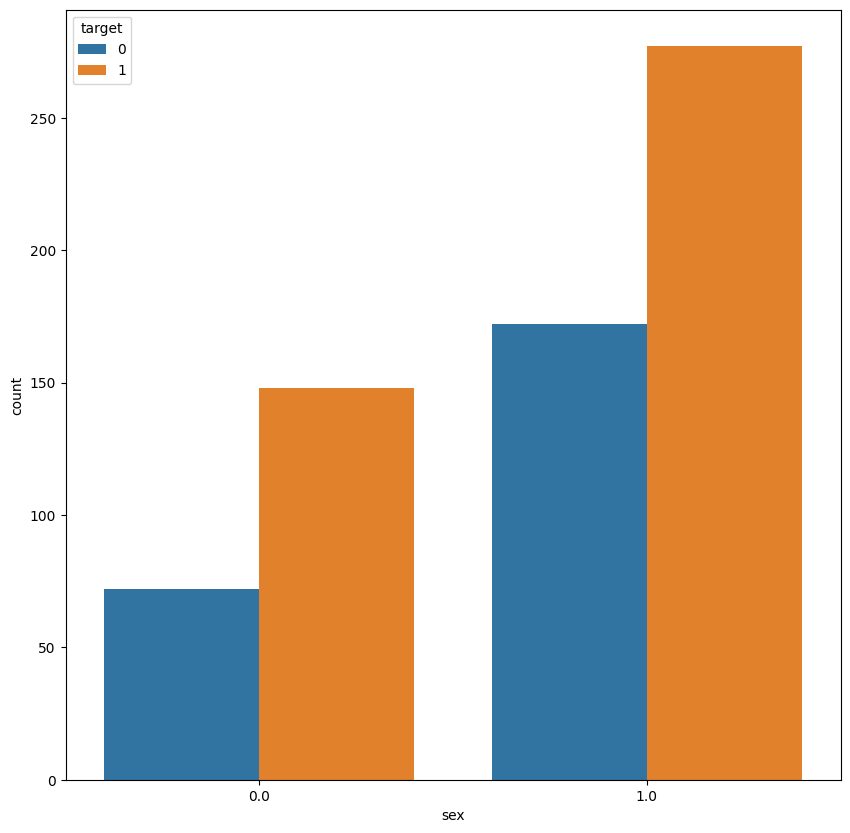

In [43]:
plt.figure(figsize= (10,10))
sns.countplot(x=df["sex"], hue=df["target"]);

In [ ]:
#What is the relationship between ca(number of heart vessel) to the target

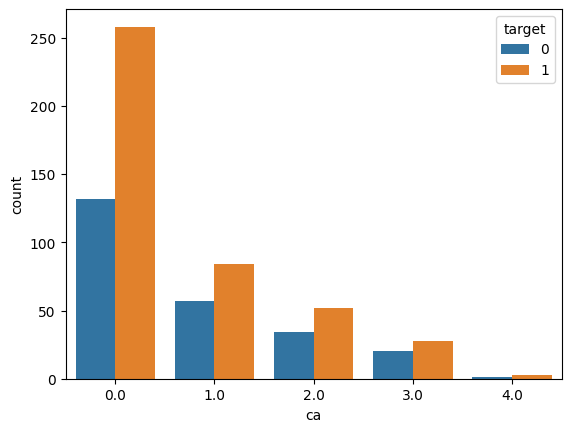

In [44]:
sns.countplot(x=df["ca"], hue=df["target"]);

In [ ]:
#The people with 4 heart vessel do not have cvd at all

#### Feature Engineering

In [46]:
sampled_df["age"] = sampled_df["age"].astype(int)

In [47]:
def age_category(x):
    if (x <= 77) & (x >= 65):
        return "aged"
    if (x <= 64) & (x >= 55):
        return "old"
    if (x <= 54) & (x >= 40):
        return "adult"
    if (x <= 39) & (x >= 29):
        return "youth"
sampled_df["age_category"] = sampled_df["age"].map(age_category)

In [48]:
sampled_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,age_category
0,63,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0,old
1,67,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1,aged
2,41,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,adult
3,56,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0,old
4,62,0.0,4.0,140.0,268.0,0.0,2.0,160.0,0.0,3.6,3.0,2.0,3.0,1,old


In [49]:
sampled_df["age_category"] = sampled_df["age_category"].replace({"youth": 0, "adult": 1, "old": 2, "aged": 3})

#### Drop leaky data

In [50]:
sampled_df = sampled_df.drop(columns="age")

#### Data Preprocessing

In [51]:
from sklearn.preprocessing import StandardScaler, OrdinalEncoder

In [52]:
scaler = StandardScaler()
sampled_df[["trestbps", "chol", "thalach"]] = scaler.fit_transform(sampled_df[["trestbps", "chol", "thalach"]])

In [53]:
order = OrdinalEncoder()
sampled_df["age_category"] = order.fit_transform(sampled_df[["age_category"]])

### Model Creation

#### Feature and target

In [54]:
X = sampled_df.drop(columns="target")
y = sampled_df["target"]

#### Splitting into training and testing set

In [55]:
from sklearn.model_selection import train_test_split

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Logistic Regression

In [57]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [58]:
lr = LogisticRegression(random_state=42)

In [59]:
lr.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [60]:
lr.score(X_train, y_train)

0.6691176470588235

In [61]:
y_prediction = lr.predict(X_test)

In [62]:
accuracy_score(y_prediction, y_test)

0.7470588235294118

### Decision Tree

In [63]:
from sklearn.tree import DecisionTreeClassifier

In [64]:
dtc = DecisionTreeClassifier(random_state=42)
dtc.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [65]:
dtc.score(X_train, y_train)

0.9161764705882353

In [66]:
y_prediction = dtc.predict(X_test)

In [67]:
accuracy_score(y_prediction, y_test)

0.8117647058823529

### RandomForest Classifier

In [68]:
from sklearn.ensemble import RandomForestClassifier

In [69]:
rfc = RandomForestClassifier(random_state=42)
rfc.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [70]:
rfc_ypred = rfc.predict(X_test)

In [71]:
rfc.score(X_train, y_train)

0.9161764705882353

In [72]:
accuracy_score(rfc_ypred, y_test)

0.8235294117647058

In [73]:
sampled_df.head()

,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,age_category
0,1.0,1.0,0.788123,-0.240439,1.0,2.0,0.008098,0.0,2.3,3.0,0.0,6.0,0,2.0
1,1.0,4.0,-0.672128,-0.319157,0.0,2.0,-0.918466,1.0,2.6,2.0,2.0,7.0,1,3.0
2,0.0,2.0,-0.088027,-0.811148,0.0,2.0,0.978783,0.0,1.4,1.0,0.0,3.0,0,1.0
3,1.0,2.0,-0.672128,-0.181400,0.0,0.0,1.243516,0.0,0.8,1.0,0.0,3.0,0,2.0
4,0.0,4.0,0.496073,0.448348,0.0,2.0,0.449318,0.0,3.6,3.0,2.0,3.0,1,2.0
